In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score

# Models
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

# Evaluation Metrics
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report, roc_curve, auc, accuracy_score

In [ ]:
df = pd.read_csv('diabetes_binary.csv')
df.head(5)

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,0.0,1.0,26.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,3.0,5.0,30.0,0.0,1.0,4.0,6.0,8.0
1,0.0,1.0,1.0,1.0,26.0,1.0,1.0,0.0,0.0,1.0,...,1.0,0.0,3.0,0.0,0.0,0.0,1.0,12.0,6.0,8.0
2,0.0,0.0,0.0,1.0,26.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,10.0,0.0,1.0,13.0,6.0,8.0
3,0.0,1.0,1.0,1.0,28.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,3.0,0.0,3.0,0.0,1.0,11.0,6.0,8.0
4,0.0,0.0,0.0,1.0,29.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,8.0,5.0,8.0


In [ ]:
df.shape

(70692, 22)

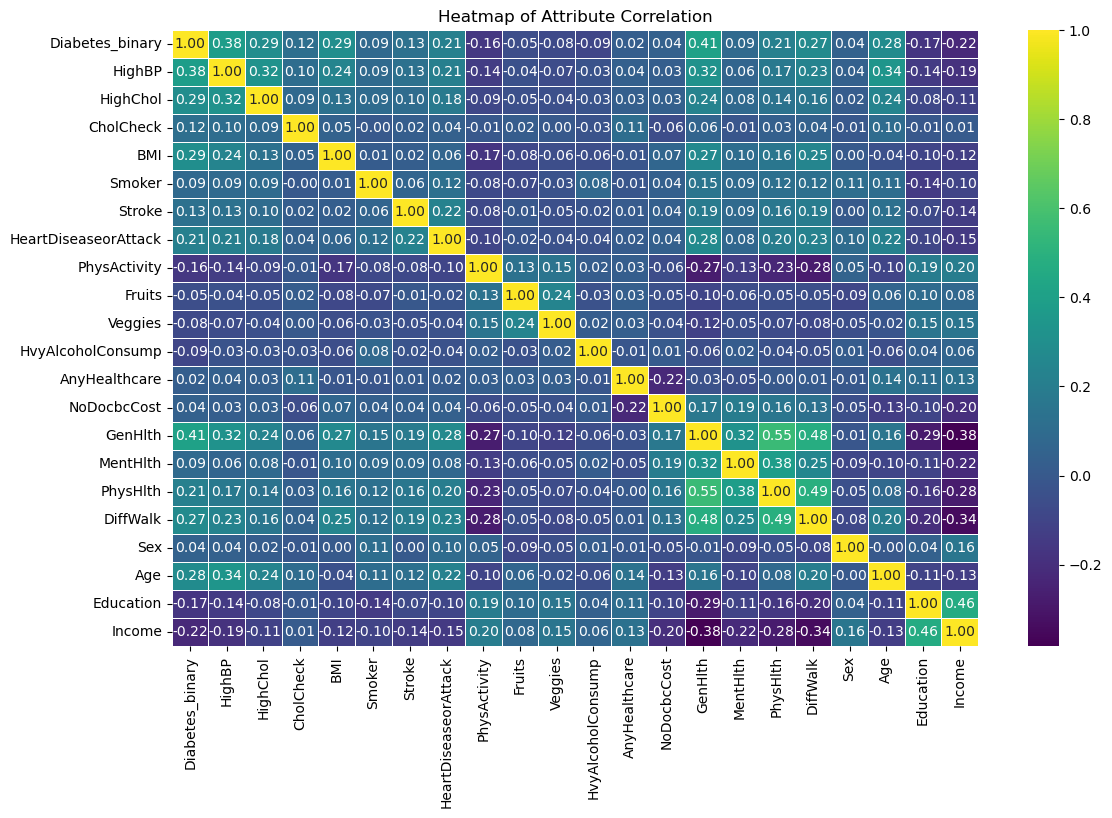

In [ ]:
# Calculate the correlation matrix
corr = df.corr()

# Create a heatmap
plt.figure(figsize=(13,8))
sns.heatmap(corr, annot=True, fmt=".2f", cmap='viridis', linewidths=.5)
plt.title('Heatmap of Attribute Correlation')
plt.show()

In [ ]:
from tabulate import tabulate

# Assuming `df` is your pandas DataFrame
summary = df.describe().T  # Transpose for similar layout

# Printing out summary statistics using tabulate for nice formatting
print(tabulate(summary, headers='keys', tablefmt='grid'))

+----------------------+---------+------------+-----------+-------+-------+-------+-------+-------+
|                      |   count |       mean |       std |   min |   25% |   50% |   75% |   max |
+======================+=========+============+===========+=======+=======+=======+=======+=======+
| Diabetes_binary      |   70692 |  0.5       |  0.500004 |     0 |     0 |   0.5 |     1 |     1 |
+----------------------+---------+------------+-----------+-------+-------+-------+-------+-------+
| HighBP               |   70692 |  0.563458  |  0.49596  |     0 |     0 |   1   |     1 |     1 |
+----------------------+---------+------------+-----------+-------+-------+-------+-------+-------+
| HighChol             |   70692 |  0.525703  |  0.499342 |     0 |     0 |   1   |     1 |     1 |
+----------------------+---------+------------+-----------+-------+-------+-------+-------+-------+
| CholCheck            |   70692 |  0.975259  |  0.155336 |     0 |     1 |   1   |     1 |     1 |


In [ ]:
# Define the number of rows and columns for subplot
n_rows = df.shape[1] // 3 + (df.shape[1] % 3 > 0)
n_cols = 3

# Create a figure and a set of subplots
fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(14, 4 * n_rows))

# Flatten axes array for easy iterating
axes = axes.flatten()

# Plot each attribute
for i, column in enumerate(df.columns):
    # For binary/categorical data, use a count plot
    if len(df[column].unique()) <= 20:  # assuming 20 or fewer unique values implies categorical
        sns.countplot(x=column, data=df, ax=axes[i])
    # For numerical/continuous data, use a histogram
    else:
        sns.histplot(df[column], bins=20, kde=True, ax=axes[i])
    axes[i].set_title(column)
    axes[i].set_ylabel('Count')

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()

In [ ]:
df["Diabetes_binary"].value_counts()

Diabetes_binary
0.0    35346
1.0    35346
Name: count, dtype: int64

In [ ]:
df["HighBP"].value_counts()

HighBP
1.0    39832
0.0    30860
Name: count, dtype: int64

In [ ]:
X = df.drop('Diabetes_binary', axis=1)
y = df['Diabetes_binary']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Checking Accuarcy for some Baby models

classifiers = [

['DecisionTree :', DecisionTreeClassifier(max_depth=5)],
['Naive Bayes :', GaussianNB()],
['KNeighbours :', KNeighborsClassifier()]]

# creating a classifier using each of the algorithms and prediciting their accuracies
print('Accuracies:')
for name, classifier in classifiers:
    classifier.fit(X_train, y_train)
    predictions = classifier.predict(X_test)
    print(name, accuracy_score(y_test, predictions))

Accuracies:
DecisionTree : 0.73520050922979
Naive Bayes : 0.7180140038192234
KNeighbours : 0.7095268406535116


In [ ]:
# XGBoost
from xgboost import XGBClassifier

# Separate the features and the target variable
X = df.drop('Diabetes_binary', axis=1)
y = df['Diabetes_binary']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize an XGBoost classifier
xgb_classifier = XGBClassifier(n_estimators=100)

# Perform cross-validation
cv_scores_xgb = cross_val_score(xgb_classifier, X_train, y_train, cv=5)

# Train the model on the entire training set
xgb_classifier.fit(X_train, y_train)

# Predict on the test set
y_pred_xgb = xgb_classifier.predict(X_test)

# Calculate performance metrics
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
classification_report_xgb = classification_report(y_test, y_pred_xgb)
confusion_matrix_xgb = confusion_matrix(y_test, y_pred_xgb)

print("XGBoost Cross-Validation Scores:", cv_scores_xgb)
print("XGBoost Cross-Validation Scores Average:", np.mean(cv_scores_xgb))
print("XGBoost Accuracy:", accuracy_xgb)
print("\nXGBoost Classification Report:\n", classification_report_xgb)
print("\nXGBoost Confusion Matrix:\n", confusion_matrix_xgb)


XGBoost Cross-Validation Scores: [0.7490938  0.74449651 0.74237468 0.74907162 0.74553492]
XGBoost Cross-Validation Scores Average: 0.7461143065430622
XGBoost Accuracy: 0.7484263384963576

XGBoost Classification Report:
               precision    recall  f1-score   support

         0.0       0.77      0.71      0.74      7090
         1.0       0.73      0.79      0.76      7049

    accuracy                           0.75     14139
   macro avg       0.75      0.75      0.75     14139
weighted avg       0.75      0.75      0.75     14139


XGBoost Confusion Matrix:
 [[5009 2081]
 [1476 5573]]


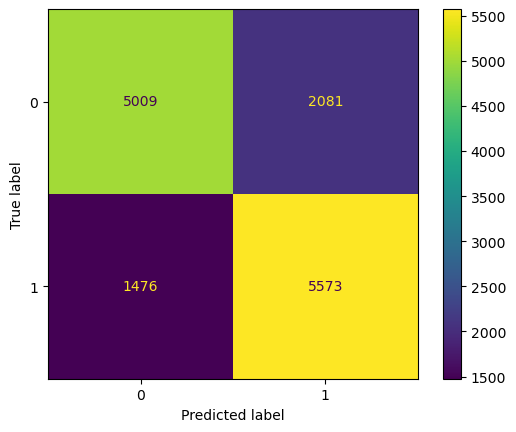

In [ ]:
labels = [0,1]
cm = confusion_matrix(y_test, y_pred_xgb, labels=labels)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
disp.plot();

In [ ]:
# Confusion matrix values provided by the user
true_negative, false_positive, false_negative, true_positive = 5009, 2081, 1476, 5573

# Calculate the conditional probabilities
# Probability of predicting 0 given the true label is 0
p_predict_0_given_true_0 = true_negative / (true_negative + false_positive)

# Probability of predicting 1 given the true label is 0
p_predict_1_given_true_0 = false_positive / (true_negative + false_positive)

# Probability of predicting 0 given the true label is 1
p_predict_0_given_true_1 = false_negative / (true_positive + false_negative)

# Probability of predicting 1 given the true label is 1
p_predict_1_given_true_1 = true_positive / (true_positive + false_negative)

# Constructing the conditional probabilities matrix
conditional_probabilities_matrix = np.array([
    [p_predict_0_given_true_0, p_predict_1_given_true_0],
    [p_predict_0_given_true_1, p_predict_1_given_true_1]
])

# Printing the conditional probabilities matrix
print("Conditional Probabilities Matrix:")
print(conditional_probabilities_matrix)

# Verifying that the columns sum to 1
print("Column sums (should be 1):")
print(conditional_probabilities_matrix.sum(axis=0))

# Verifying that the rows sum to less than or equal to 1
print("Row sums (should be less than or equal to 1):")
print(conditional_probabilities_matrix.sum(axis=1))


Conditional Probabilities Matrix:
[[0.70648801 0.29351199]
 [0.2093914  0.7906086 ]]
Column sums (should be 1):
[0.91587941 1.08412059]
Row sums (should be less than or equal to 1):
[1. 1.]


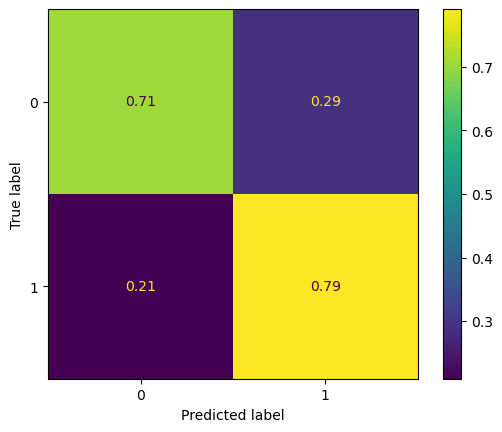

In [ ]:
disp = ConfusionMatrixDisplay(confusion_matrix=conditional_probabilities_matrix, display_labels=labels)
disp.plot();

In [ ]:
# y_pred distribution
pred_counts = pd.Series(y_pred_xgb).value_counts()
sns.barplot(x=pred_counts.index, y=pred_counts.values)

plt.title('Distribution of Predicted Classes (XGBoost)')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()

In [ ]:
# To display feature importances
feature_importances = xgb_classifier.feature_importances_
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})
print(feature_importance_df.sort_values(by='Importance', ascending=False))

                 Feature  Importance
0                 HighBP    0.490462
13               GenHlth    0.139506
1               HighChol    0.054960
2              CholCheck    0.041313
10     HvyAlcoholConsump    0.038539
18                   Age    0.030823
6   HeartDiseaseorAttack    0.027025
3                    BMI    0.025594
16              DiffWalk    0.020632
17                   Sex    0.019064
20                Income    0.013460
5                 Stroke    0.012203
8                 Fruits    0.010432
19             Education    0.010268
4                 Smoker    0.009669
11         AnyHealthcare    0.009521
14              MentHlth    0.009496
12           NoDocbcCost    0.009472
9                Veggies    0.009261
7           PhysActivity    0.009247
15              PhysHlth    0.009051


In [ ]:
# Create a bar chart for feature importances
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)

# Add labels and title
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Feature Importance Visualization')

from matplotlib.ticker import MultipleLocator
ax = plt.gca()
ax.xaxis.set_major_locator(MultipleLocator(0.02))

# Show the plot
plt.show()

In [ ]:
# Feature Selection with XGBoost
selected_features = feature_importance_df.sort_values(by='Importance', ascending=False).head(11)['Feature']

# Extract only the selected features from the original dataset
X_selected = X[selected_features]

# Split the data into training and test sets
X_train_selected, X_test_selected, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)

# Initialize an XGBoost classifier
xgb_classifier_selected = XGBClassifier(n_estimators=100)

# Perform cross-validation on the selected features
cv_scores_selected = cross_val_score(xgb_classifier_selected, X_train_selected, y_train, cv=5)

# Train the model on the training set using selected features
xgb_classifier_selected.fit(X_train_selected, y_train)

# Predict on the test set using selected features
y_pred_selected = xgb_classifier_selected.predict(X_test_selected)

# Calculate performance metrics for the selected features
accuracy_selected = accuracy_score(y_test, y_pred_selected)
classification_report_selected = classification_report(y_test, y_pred_selected)
confusion_matrix_selected = confusion_matrix(y_test, y_pred_selected)

print(f"Selected Features: {selected_features.tolist()}")
print("\nXGBoost Cross-Validation Scores with Selected Features:", cv_scores_selected)
print("XGBoost Cross-Validation Scores Average with Selected Features:", np.mean(cv_scores_selected))
print("XGBoost Accuracy with Selected Features:", accuracy_selected)
print("\nXGBoost Classification Report with Selected Features:\n", classification_report_selected)
print("\nXGBoost Confusion Matrix with Selected Features:\n", confusion_matrix_selected)

Selected Features: ['HighBP', 'GenHlth', 'HighChol', 'CholCheck', 'HvyAlcoholConsump', 'Age', 'HeartDiseaseorAttack', 'BMI', 'DiffWalk', 'Sex', 'Income']

XGBoost Cross-Validation Scores with Selected Features: [0.74918221 0.74317037 0.74918221 0.74792219 0.74553492]
XGBoost Cross-Validation Scores Average with Selected Features: 0.7469983813476722
XGBoost Accuracy with Selected Features: 0.7511139401654997

XGBoost Classification Report with Selected Features:
               precision    recall  f1-score   support

         0.0       0.78      0.70      0.74      7090
         1.0       0.73      0.80      0.76      7049

    accuracy                           0.75     14139
   macro avg       0.75      0.75      0.75     14139
weighted avg       0.75      0.75      0.75     14139


XGBoost Confusion Matrix with Selected Features:
 [[4993 2097]
 [1422 5627]]


In [ ]:
# Feature Scaling for XGBoost

# Min-max scaling
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df_scaled = scaler.fit_transform(df)

# Separate the features and the target variable
X = np.delete(df_scaled, 1, axis=1)
y = df_scaled[:, 1]

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize an XGBoost classifier
xgb_classifier = XGBClassifier(n_estimators=100)

# Perform cross-validation
cv_scores_xgb = cross_val_score(xgb_classifier, X_train, y_train, cv=5)

# Train the model on the entire training set
xgb_classifier.fit(X_train, y_train)

# Predict on the test set
y_pred_xgb = xgb_classifier.predict(X_test)

# Calculate performance metrics
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
classification_report_xgb = classification_report(y_test, y_pred_xgb)
confusion_matrix_xgb = confusion_matrix(y_test, y_pred_xgb)

print("XGBoost Cross-Validation Scores:", cv_scores_xgb)
print("XGBoost Cross-Validation Scores Average:", np.mean(cv_scores_xgb))
print("XGBoost Accuracy:", accuracy_xgb)
print("\nXGBoost Classification Report:\n", classification_report_xgb)
print("\nXGBoost Confusion Matrix:\n", confusion_matrix_xgb)

XGBoost Cross-Validation Scores: [0.73760057 0.73671647 0.74290514 0.74279399 0.74120248]
XGBoost Cross-Validation Scores Average: 0.7402437272825269
XGBoost Accuracy: 0.7349883301506471

XGBoost Classification Report:
               precision    recall  f1-score   support

         0.0       0.72      0.63      0.68      6156
         1.0       0.74      0.81      0.78      7983

    accuracy                           0.73     14139
   macro avg       0.73      0.72      0.73     14139
weighted avg       0.73      0.73      0.73     14139


XGBoost Confusion Matrix:
 [[3906 2250]
 [1497 6486]]


In [ ]:
# # Dealing with Imbalanced Classes for XGBoost

# # Example: Oversampling using SMOTE
# !pip3 install imbalanced-learn
# from imblearn.over_sampling import SMOTE

# # Separate the features and the target variable
# X = df.drop('Diabetes_binary', axis=1)
# y = df['Diabetes_binary']

# # Split the data into training and test sets
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# X_resampled, y_resampled = SMOTE().fit_resample(X_train, y_train)

# # Initialize an XGBoost classifier
# xgb_classifier = XGBClassifier(n_estimators=100)

# # Perform cross-validation
# cv_scores_xgb = cross_val_score(xgb_classifier, X_resampled, y_resampled, cv=5)

# # Train the model on the entire training set
# xgb_classifier.fit(X_resampled, y_resampled)

# # Predict on the test set
# y_pred_xgb = xgb_classifier.predict(X_test)

# # Calculate performance metrics
# accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
# classification_report_xgb = classification_report(y_test, y_pred_xgb)
# confusion_matrix_xgb = confusion_matrix(y_test, y_pred_xgb)

# print("XGBoost Cross-Validation Scores:", cv_scores_xgb)
# print("XGBoost Cross-Validation Scores Average:", np.mean(cv_scores_xgb))
# print("XGBoost Accuracy:", accuracy_xgb)
# print("\nXGBoost Classification Report:\n", classification_report_xgb)
# print("\nXGBoost Confusion Matrix:\n", confusion_matrix_xgb)

In [ ]:
# Logistic Regression

# Separate the features and the target variable
X = df.drop('Diabetes_binary', axis=1)
y = df['Diabetes_binary']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize a Logistic Regression classifier
logreg_classifier = LogisticRegression(max_iter=1000)

# Perform cross-validation
cv_scores = cross_val_score(logreg_classifier, X_train, y_train, cv=5)

# Train the model on the training set
logreg_classifier.fit(X_train, y_train)

# Predict on the test set
y_pred_lr = logreg_classifier.predict(X_test)

# Calculate performance metrics
accuracy = accuracy_score(y_test, y_pred_lr)
classification_report_result = classification_report(y_test, y_pred_lr)
confusion_matrix_result = confusion_matrix(y_test, y_pred_lr)

print("Logistic Regression Cross-Validation Scores:", cv_scores)
print("Logistic Regression Cross-Validation Scores Average:", np.mean(cv_scores))
print("Logistic Regression Accuracy:", accuracy)
print("\nLogistic Regression Classification Report:\n", classification_report_result)
print("\nLogistic Regression Confusion Matrix:\n", confusion_matrix_result)

Logistic Regression Cross-Validation Scores: [0.7472372  0.74608788 0.74874016 0.74880637 0.74588859]
Logistic Regression Cross-Validation Scores Average: 0.7473520412865389
Logistic Regression Accuracy: 0.7484263384963576

Logistic Regression Classification Report:
               precision    recall  f1-score   support

         0.0       0.76      0.73      0.74      7090
         1.0       0.74      0.77      0.75      7049

    accuracy                           0.75     14139
   macro avg       0.75      0.75      0.75     14139
weighted avg       0.75      0.75      0.75     14139


Logistic Regression Confusion Matrix:
 [[5155 1935]
 [1622 5427]]


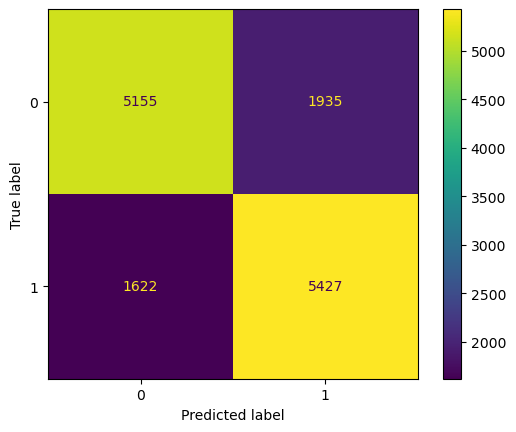

In [ ]:
labels = [0,1]
cm = confusion_matrix(y_test, y_pred_lr, labels=labels)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
disp.plot();

Conditional Probabilities Matrix:
[[0.72708039 0.27291961]
 [0.23010356 0.76989644]]
Column sums (should be 1):
[0.95718396 1.04281604]
Row sums (should be less than or equal to 1):
[1. 1.]


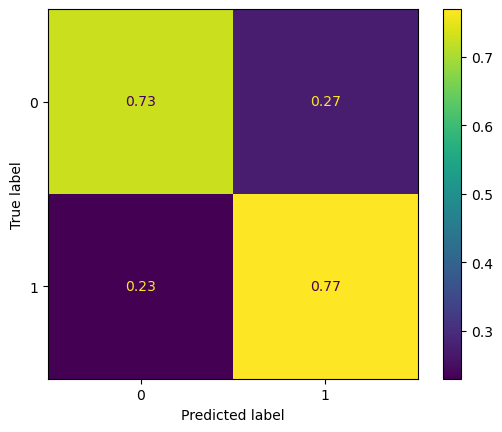

In [ ]:
# Confusion matrix values provided by the user
true_negative, false_positive, false_negative, true_positive = 5155, 1935, 1622, 5427

# Calculate the conditional probabilities
# Probability of predicting 0 given the true label is 0
p_predict_0_given_true_0 = true_negative / (true_negative + false_positive)

# Probability of predicting 1 given the true label is 0
p_predict_1_given_true_0 = false_positive / (true_negative + false_positive)

# Probability of predicting 0 given the true label is 1
p_predict_0_given_true_1 = false_negative / (true_positive + false_negative)

# Probability of predicting 1 given the true label is 1
p_predict_1_given_true_1 = true_positive / (true_positive + false_negative)

# Constructing the conditional probabilities matrix
conditional_probabilities_matrix = np.array([
    [p_predict_0_given_true_0, p_predict_1_given_true_0],
    [p_predict_0_given_true_1, p_predict_1_given_true_1]
])

# Printing the conditional probabilities matrix
print("Conditional Probabilities Matrix:")
print(conditional_probabilities_matrix)

# Verifying that the columns sum to 1
print("Column sums (should be 1):")
print(conditional_probabilities_matrix.sum(axis=0))

# Verifying that the rows sum to less than or equal to 1
print("Row sums (should be less than or equal to 1):")
print(conditional_probabilities_matrix.sum(axis=1))

disp = ConfusionMatrixDisplay(confusion_matrix=conditional_probabilities_matrix, display_labels=labels)
disp.plot();

In [ ]:
# y_pred distribution
pred_counts = pd.Series(y_pred_lr).value_counts()
sns.barplot(x=pred_counts.index, y=pred_counts.values)

plt.title('Distribution of Predicted Classes (Logistic Regression)')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()

In [ ]:
# To display feature coefficients
feature_coefficients = logreg_classifier.coef_[0]
feature_coefficient_df = pd.DataFrame({'Feature': X.columns, 'Coefficient': feature_coefficients})
print(feature_coefficient_df.sort_values(by='Coefficient', ascending=False))

                 Feature  Coefficient
2              CholCheck     1.324001
0                 HighBP     0.743054
13               GenHlth     0.588842
1               HighChol     0.573572
17                   Sex     0.262450
6   HeartDiseaseorAttack     0.253851
18                   Age     0.152596
5                 Stroke     0.149437
16              DiffWalk     0.129252
3                    BMI     0.074349
11         AnyHealthcare     0.039540
12           NoDocbcCost     0.029323
4                 Smoker    -0.001873
14              MentHlth    -0.004644
15              PhysHlth    -0.008109
7           PhysActivity    -0.026074
19             Education    -0.028226
8                 Fruits    -0.053044
20                Income    -0.058603
9                Veggies    -0.088387
10     HvyAlcoholConsump    -0.751206


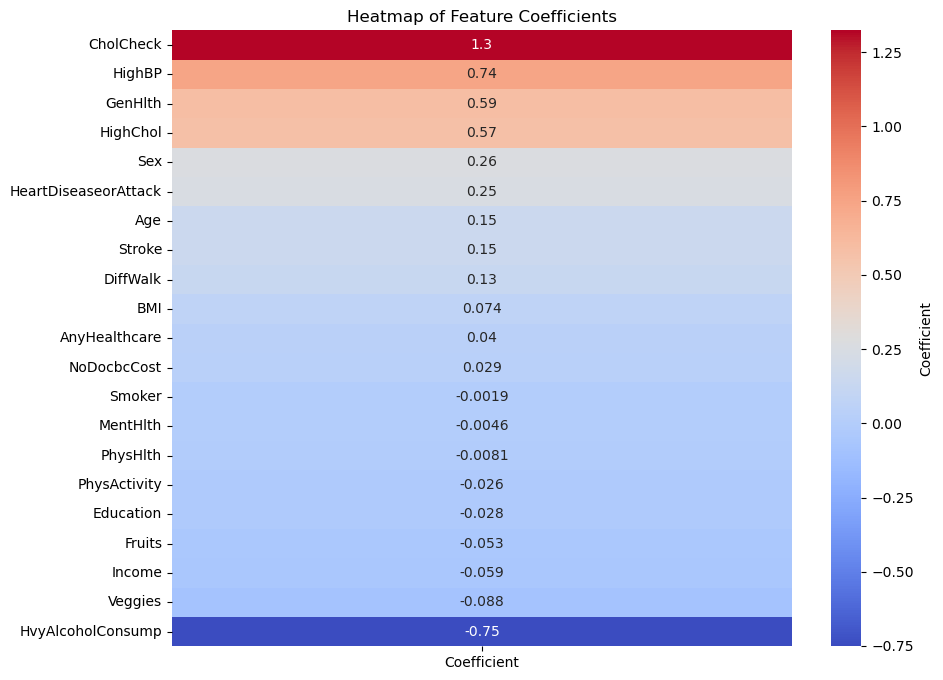

In [ ]:
# Get feature coefficients
feature_coefficients = logreg_classifier.coef_[0]

# Create a DataFrame for feature coefficients
feature_coefficient_df = pd.DataFrame(feature_coefficients, index=X.columns, columns=['Coefficient'])

# Create a heatmap for feature coefficients
plt.figure(figsize=(10, 8))
sns.heatmap(feature_coefficient_df.sort_values(by='Coefficient', ascending=False), annot=True, cmap='coolwarm', cbar_kws={'label': 'Coefficient'})

# Add labels and title
plt.title('Heatmap of Feature Coefficients')

# Show the plot
plt.show()

In [ ]:
# Feature Scaling for Logistic Regression

# Example: Min-max scaling
scaler = MinMaxScaler()
df_scaled = scaler.fit_transform(df)

# Separate the features and the target variable
X = np.delete(df_scaled, 1, axis=1)
y = df_scaled[:, 1]

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize a Logistic Regression classifier
logreg_classifier = LogisticRegression(max_iter=1000)

# Perform cross-validation
cv_scores = cross_val_score(logreg_classifier, X_train, y_train, cv=5)

# Train the model on the training set
logreg_classifier.fit(X_train, y_train)

# Predict on the test set
y_pred_lr = logreg_classifier.predict(X_test)

# Calculate performance metrics
accuracy = accuracy_score(y_test, y_pred_lr)
classification_report_result = classification_report(y_test, y_pred_lr)
confusion_matrix_result = confusion_matrix(y_test, y_pred_lr)

print("Logistic Regression Cross-Validation Scores:", cv_scores)
print("Logistic Regression Cross-Validation Scores Average:", np.mean(cv_scores))
print("Logistic Regression Accuracy:", accuracy)
print("\nLogistic Regression Classification Report:\n", classification_report_result)
print("\nLogistic Regression Confusion Matrix:\n", confusion_matrix_result)

Logistic Regression Cross-Validation Scores: [0.74175581 0.74087172 0.75439837 0.74792219 0.74686118]
Logistic Regression Cross-Validation Scores Average: 0.7463618563058534
Logistic Regression Accuracy: 0.7397977226112172

Logistic Regression Classification Report:
               precision    recall  f1-score   support

         0.0       0.72      0.65      0.69      6156
         1.0       0.75      0.81      0.78      7983

    accuracy                           0.74     14139
   macro avg       0.74      0.73      0.73     14139
weighted avg       0.74      0.74      0.74     14139


Logistic Regression Confusion Matrix:
 [[4011 2145]
 [1534 6449]]


In [ ]:
# Regularization for Logistic Regression
from sklearn.model_selection import GridSearchCV

# Define a range of regularization strengths to test
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}

# Initialize a Logistic Regression classifier
logreg_classifier_tuned = LogisticRegression(max_iter=1000)

# Create a GridSearchCV object
grid_search = GridSearchCV(logreg_classifier_tuned, param_grid, cv=5, scoring='accuracy')

X = df.drop('Diabetes_binary', axis=1)
y = df['Diabetes_binary']

# Perform the grid search on the entire dataset
grid_search.fit(X, y)

# Display the best parameter found by the grid search
best_C = grid_search.best_params_['C']
print(f"Best Regularization Strength (C): {best_C}")

# Use the best parameter to initialize the Logistic Regression classifier
logreg_classifier_tuned = LogisticRegression(max_iter=1000, C=best_C)

# Split the data into training and test sets
X_train_tuned, X_test_tuned, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Perform cross-validation on the training set with the tuned model
cv_scores_tuned = cross_val_score(logreg_classifier_tuned, X_train_tuned, y_train, cv=5)

# Train the model on the training set with the tuned model
logreg_classifier_tuned.fit(X_train_tuned, y_train)

# Predict on the test set with the tuned model
y_pred_tuned = logreg_classifier_tuned.predict(X_test_tuned)

# Calculate performance metrics for the tuned model
accuracy_tuned = accuracy_score(y_test, y_pred_tuned)
classification_report_tuned = classification_report(y_test, y_pred_tuned)
confusion_matrix_tuned = confusion_matrix(y_test, y_pred_tuned)

print("\nLogistic Regression Cross-Validation Scores with Tuned Model:", cv_scores_tuned)
print("Logistic Regression Cross-Validation Scores Average with Tuned Model:", np.mean(cv_scores_tuned))
print("Logistic Regression Accuracy with Tuned Model:", accuracy_tuned)
print("\nLogistic Regression Classification Report with Tuned Model:\n", classification_report_tuned)
print("\nLogistic Regression Confusion Matrix with Tuned Model:\n", confusion_matrix_tuned)

Best Regularization Strength (C): 1

Logistic Regression Cross-Validation Scores with Tuned Model: [0.7472372  0.74608788 0.74874016 0.74880637 0.74588859]
Logistic Regression Cross-Validation Scores Average with Tuned Model: 0.7473520412865389
Logistic Regression Accuracy with Tuned Model: 0.7484263384963576

Logistic Regression Classification Report with Tuned Model:
               precision    recall  f1-score   support

         0.0       0.76      0.73      0.74      7090
         1.0       0.74      0.77      0.75      7049

    accuracy                           0.75     14139
   macro avg       0.75      0.75      0.75     14139
weighted avg       0.75      0.75      0.75     14139


Logistic Regression Confusion Matrix with Tuned Model:
 [[5155 1935]
 [1622 5427]]
